<a href="https://colab.research.google.com/github/aruntahilramani/134_ArunTahilramani/blob/master/Lab%2011/134_PCA_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                    # Linear algebra library
import matplotlib.pyplot as plt       # library for visualization
from sklearn.decomposition import PCA # PCA library
import pandas as pd                   # Data frame library
import math                           # Library for math functions
import random                         # Library for pseudo random numbers

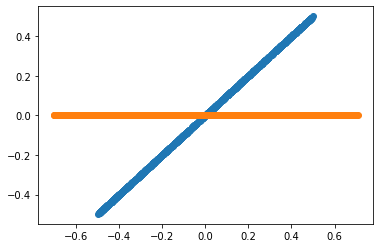

In [2]:
n = 1 # The amount of the correlation

x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, data.y)           # Plot the original correlated data in blue
pca = PCA(n_components = 2)           # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)
rotatedData = pcaTr.transform(data)  # Transform the data base on the rotation matrix of pcaTr

# Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [3]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.73144663e-01 4.91716354e-33]


In [ ]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(134)

std1 = 1 # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable

x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000) # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA works better if the data is centered
x = x - np.mean(x) # Center x
y = y - np.mean(y) # Center y

# Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance.
angle = np.arctan(1 / n) # Convert the covariance to and angle
print('angle: ', angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])

print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.71820387 -0.69583274]
 [ 0.69583274 -0.71820387]]

Eigenvalues or explained variance
[1.00140881 0.11593342]


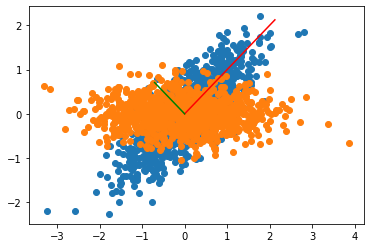

In [5]:
plt.scatter(data[:,0], data[:,1])     # Print the original data in blue

# Apply PCA. In theory, the Eigenvector matrix must be the
# inverse of the original rotationMatrix.
pca = PCA(n_components = 2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k-', color='red')

# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k-', color='green')
plt.show()

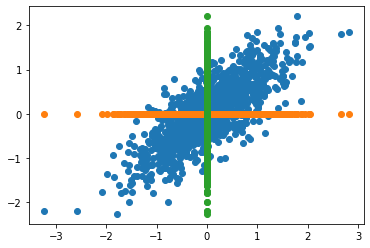

In [6]:
nPoints = len(data)
# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])
#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))
#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])
plt.show()